
# Trabalho de Projeto Integrador: **Mineração de Notícias**

Parte 1

Data: 04/2021

Professor: Marcelo Sandi

Aluna: Flávia G. Gaia Paula

---



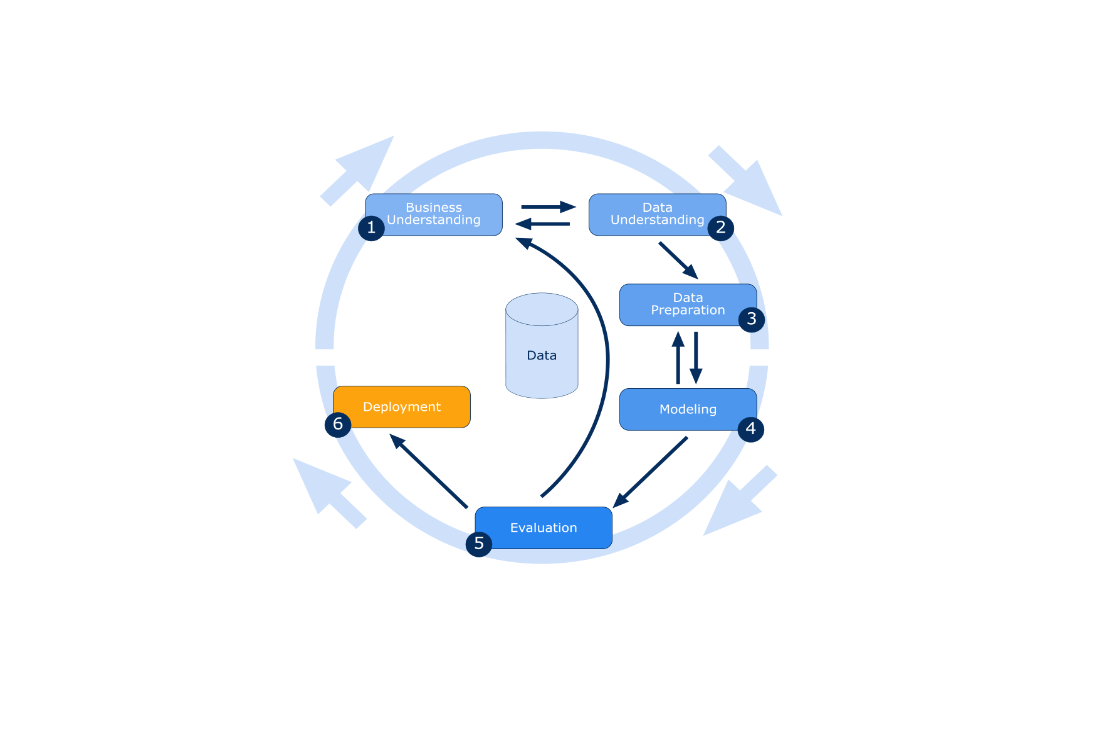

***Business Understanding***

O intuito deste trabalho é fazer o scraping de sites de notícia usando a linguagem python e posteriomente analisar processar esses dados, seguindo a metodologia CRISP-DM. 




***Data Understanding***

Os dados deste projeto serão retirados por meio de Web Scraping dos sites Folha de SP, CNN Brasil e Correio Braziliense.


***Data Preparation***


# Faz o Scraping nos sites e grava no banco de dados:

import newspaper 
from newspaper import Article
#import nltk
import time
import numpy as np
import psycopg2
import uuid
#from datetime import datetime

#nltk.download('punkt')

start = time.time()

print('Processamento Iniciado ...')

# Criamos a função para gravar as notícias no banco de dados:

def gravar_artigo(conn, id_veiculo, id_categoria, link, titulo, resumo, imagem, texto, autores, dt_publicacao):

    try:
        id = str(uuid.uuid4())

        insert_query = "INSERT INTO noticiasweb " +\
                       "(id, id_veiculo, id_categoria, link, titulo, resumo, imagem, texto, autores, dt_publicacao) " +\
                       "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

        cursor = conn.cursor()
        cursor.execute(insert_query, (id, id_veiculo, id_categoria, link, titulo, resumo, imagem, texto, autores, dt_publicacao))
        conn.commit()
        count = cursor.rowcount

        print(count, "Registro inserido com sucesso ->" + id)

    except (Exception, psycopg2.Error) as error:
        print("Falhou ao inserir registro -> " + id, error)


# newspaper.languages()
# Fontes dos artigos: para os links dentro da lista fonte extraia todos os artigos e suas categorias
#

conn = psycopg2.connect("host=localhost port=5433 dbname=postgres user=postgres password=123")

cursor = conn.cursor()
cursor.execute('select * from veiculos')
veiculos = cursor.fetchall()
minhalista = []

for veiculo in veiculos:

    #fontes = ['https://www.folha.uol.com.br/',
    #          'https://www.cnnbrasil.com.br/',
    #          'https://www.correiobraziliense.com.br/']
    #minhalista = []

    print(veiculo)
    url = veiculo[2]
    print(url)
    paper = newspaper.build(url)
    # Extraindo os artigos das fontes
    for category in paper.category_urls():
        pagina = newspaper.build(category)
        for artigo in pagina.articles:
          #print(artigo.url)
          minhalista.append(artigo.url)

    print(minhalista)
    artigos_info = list()

    for item in minhalista:
        #print('url -> ' + item)
        url1 = item
        article1 = Article(url1)
        article1.download()
        article1.html
        artigos_dict = dict()
        artigos_dict['url'] = item

        try:
            article1.parse()

            #print('artigo -> ' + article1.title)

            artigos_dict['titulo'] = article1.title
            artigos_dict['autores'] = article1.authors
            artigos_dict['data da publicação'] = article1.publish_date
            artigos_dict['texto'] = article1.text
            artigos_dict['imagem'] = article1.top_image
            artigos_dict['filmes'] = article1.movies
            article1.nlp()
            artigos_dict['palavras-chave'] = article1.keywords
            artigos_dict['sumario'] = article1.summary
        except:
            article1.parse()
            artigos_dict['titulo'] = np.nan
            artigos_dict['autores'] = np.nan
            artigos_dict['data da publicação'] = np.nan
            artigos_dict['texto'] = np.nan
            artigos_dict['imagem'] = np.nan
            artigos_dict['filmes'] = np.nan
            artigos_dict['palavras-chave'] = np.nan
            artigos_dict['sumario'] = np.nan

        gravar_artigo(conn, veiculo[0], '222', item, article1.title, article1.summary, article1.top_image, article1.text, article1.authors, article1.publish_date)


# **Scraping no banco**

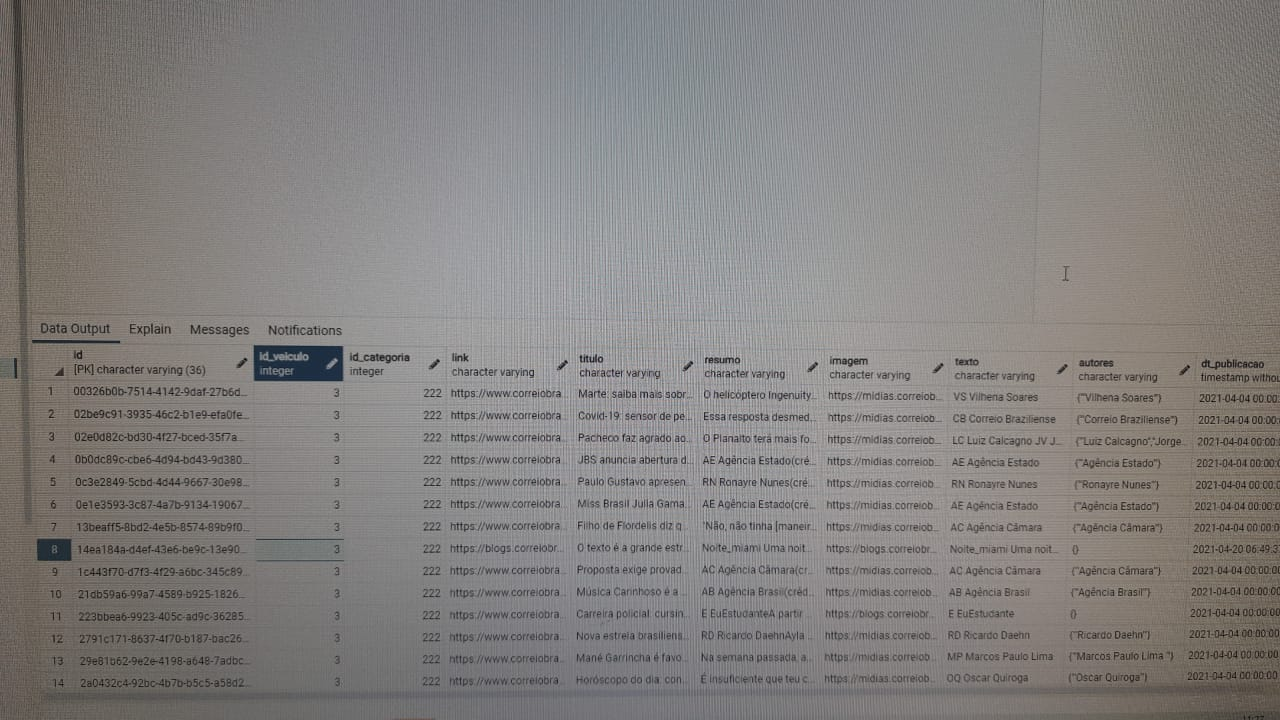

# **Site utilizando para o Scraping saindo do banco de dados**

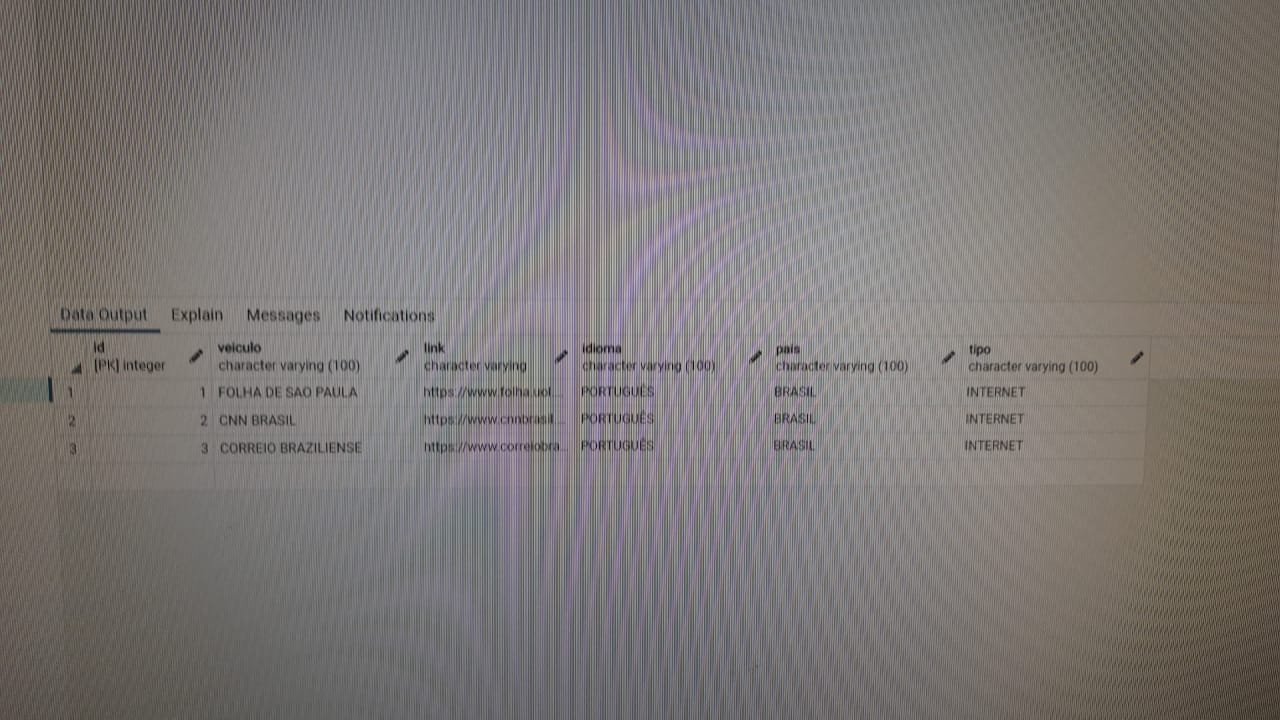